<a href="https://colab.research.google.com/github/red21steven/Hotel-Reservation-Analysis-Cancellation-Prediction/blob/main/Hotel_Reservation_Analysis_%26_Cancellation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Reservation Analysis & Cancellation Prediction

    The dataset used in this project is downloaded from kaggle
    https://www.kaggle.com/jessemostipak/hotel-booking-demand 

    This dataset contains booking information for a city hotel and a  
    resort hotel and includes information such as when the booking was 
    made, length of stay, the number of adults, children, and/or babies, 
    and the number of available parking spaces, among other things. 
    
    In this project I've performed exploratory data analysis with python 
    to get insight from the data.

    And built a machine learning model to predict the booking 
    cancellation in the hotel.

In [ ]:
!pip install folium
!pip install squarify
!pip install sorted-months-weekdays
!pip install sort_dataframeby_monthorweek

In [ ]:
import pandas as pd
import numpy as np
import squarify
import folium
from folium.plugins import HeatMap
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import sort_dataframeby_monthorweek as sd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Personal projects/hotel_bookings.csv')
df.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Checking to see if there are any null values
df.isnull().values.any()

True

In [ ]:
#Finding what are the total number of total null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Replace missing values:
# agent: If no agency is given, booking was most likely made without an agent.
# company: If none given, it was most likely done privately by the customer.
# rest schould be self-explanatory.
# filling the columns containig the NaN values with 0 
df.fillna(0, inplace=True) #inplace is used to make the change permenent to the dataset

In [ ]:
# Checking to see if theres any null values in the dataset 
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
# Exploring how many values does the column meal contains 
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
# Checking the value in the children column
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [ ]:
# Checking the value in the adults column
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [ ]:
# Checking the value in the babies column
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

    From the above analysis we can see that the columns Adults,babies & children has the value 0 at the same time so I'm creating a filter to negate those rows in the dataset.

In [ ]:
# finding how much rows in the column adult has the value 0
len(df[df['adults']==0])

403

In [ ]:
# finding how much rows in the column children has the value 0
len(df[df['children']==0])

110800

In [ ]:
# finding how much rows in the column babies has the value 0
len(df[df['babies']==0])

118473

In [ ]:
# creating a filter to filter the null values in the Adults, babies & children columns
filtering_zeros=(df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filtering_zeros]

hotel  is_canceled  ...  reservation_status  reservation_status_date
2224    Resort Hotel            0  ...           Check-Out                10/6/2015
2409    Resort Hotel            0  ...           Check-Out               10/12/2015
3181    Resort Hotel            0  ...           Check-Out               11/23/2015
3684    Resort Hotel            0  ...           Check-Out                 1/4/2016
3708    Resort Hotel            0  ...           Check-Out                 1/5/2016
...              ...          ...  ...                 ...                      ...
115029    City Hotel            0  ...           Check-Out                6/30/2017
115091    City Hotel            0  ...           Check-Out                 7/1/2017
116251    City Hotel            0  ...           Check-Out                7/17/2017
116534    City Hotel            0  ...           Check-Out                7/22/2017
117087    City Hotel            0  ...           Check-Out                7/29/2017

[180 rows x 32 columns]

In [ ]:
# Negating the rows containing the null values using the ~ symbol
data = df[~filtering_zeros]

In [ ]:
data.shape

(119210, 32)

In [ ]:
data.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
data

hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out                 7/1/2015
1       Resort Hotel            0  ...           Check-Out                 7/1/2015
2       Resort Hotel            0  ...           Check-Out                 7/2/2015
3       Resort Hotel            0  ...           Check-Out                 7/2/2015
4       Resort Hotel            0  ...           Check-Out                 7/3/2015
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out                 9/6/2017
119386    City Hotel            0  ...           Check-Out                 9/7/2017
119387    City Hotel            0  ...           Check-Out                 9/7/2017
119388    City Hotel            0  ...           Check-Out                 9/7/2017
119389    City Hotel            0  ...           Check-Out                 9/7/2017

[119210 rows x 32 columns]

 #### After cleaning the data with null values, now separating Resort and City hotel from the column hotel.

In [ ]:
# Checking to see how much values does City Hotel & Resort Hotel has in the dataset
data["hotel"].value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

In [ ]:
# Filtering the hotel column into resort hotel & city hotel where the booking is not cancelled
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

In [ ]:
# Checking the shape
resort.shape

(28927, 32)

In [ ]:
# Checking the shape
city.shape

(46084, 32)

## Where do the guests come from?

In [ ]:
resort.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
labels=resort['country'].value_counts().index
values=resort['country'].value_counts()

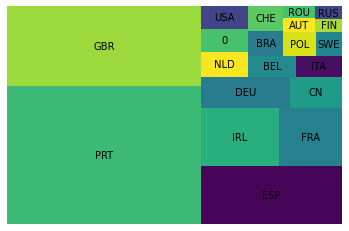

In [ ]:
data = values
squarify.plot(values.head(20), label=labels)
plt.axis('off')
plt.show()

## Home country of Guests, perform Spatial Analysis

In [ ]:
country_wise_data = data[data["is_canceled"]==0]["country"].value_counts().reset_index()
country_wise_data.columns = ['country','No of guests']
country_wise_data

country  No of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     BHS             1
162     GUY             1
163     BHR             1
164     MMR             1
165     SMR             1

[166 rows x 2 columns]

In [ ]:
basemap=folium.Map()

In [ ]:
country_wise_data.dtypes

country         object
No of guests     int64
dtype: object

In [ ]:
# show on map
map_guest = px.choropleth(country_wise_data,
                    locations=country_wise_data['country'],
                    color=country_wise_data['No of guests'], 
                    hover_name=country_wise_data['country'], 
                    title="Home country of guests")
map_guest.show()


    
    People from all over the world are staying in these two hotels. 

    Most guests are from Portugal and other countries in Europe

## How much do guests pay for a room per night?

In [ ]:
data.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

    Both hotels have different room types and different meal arrangements. Seasonal factors are also important. 

    So the prices vary a lot. 

    Since no currency information is given, but Portugal is part of the European Monetary Union, So let's assume that all prices are in EUR.

In [ ]:
data2=data[data['is_canceled']==0]

In [ ]:
data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

In [ ]:
px.box(data2, x="reserved_room_type", y="adr", color='hotel', title='Price of room types per night and person', template='plotly_dark')

    This figure shows the average price per room, depending on its type and the standard deviation. 

    Note that due to data anonymization rooms with the same type letter may not necessarily be the same across hotels.

## How does the price per night vary over the year?

In [ ]:
data_resort=resort[resort['is_canceled']==0]

In [ ]:
data_city=city[city['is_canceled']==0]

In [ ]:
data_resort.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.410104
3            February   54.147478
4             January   48.761125
5                July  150.122528
6                June  107.974850
7               March   57.056838
8                 May   76.657558
9            November   48.706289
10            October   61.775449
11          September   96.416860

In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

arrival_date_month         adr
0               April  111.962267
1              August  118.674598
2            December   88.401855
3            February   86.520062
4             January   82.330983
5                July  115.818019
6                June  117.874360
7               March   90.658533
8                 May  120.669827
9            November   86.946592
10            October  102.004672
11          September  112.776582

In [ ]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

month  price_for_resort  price_for_city_hotel
0       April         75.867816            111.962267
1      August        181.205892            118.674598
2    December         68.410104             88.401855
3    February         54.147478             86.520062
4     January         48.761125             82.330983
5        July        150.122528            115.818019
6        June        107.974850            117.874360
7       March         57.056838             90.658533
8         May         76.657558            120.669827
9    November         48.706289             86.946592
10    October         61.775449            102.004672
11  September         96.416860            112.776582

    now we will observe over here is month column is not in order, & if we will visualise we will get improper conclusion
    so very first we have to provide right hierarchy to the month column

In [ ]:
final=sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

month  price_for_resort  price_for_city_hotel
0     January         48.761125             82.330983
1    February         54.147478             86.520062
2       March         57.056838             90.658533
3       April         75.867816            111.962267
4         May         76.657558            120.669827
5        June        107.974850            117.874360
6        July        150.122528            115.818019
7      August        181.205892            118.674598
8   September         96.416860            112.776582
9     October         61.775449            102.004672
10   November         48.706289             86.946592
11   December         68.410104             88.401855

In [ ]:
d = ['price_for_resort','price_for_city_hotel']

for i in d:
    fig = px.line(final, x = 'month', y = i, title = f'Room {str(i)} per night over the Months', template='plotly_dark')
    fig.show()

####Conclusion-->> 
    This clearly shows that the prices in the Resort hotel are much higher during the summer (no surprise here).

    The price of the city hotel varies less and is most expensive during spring and autumn.

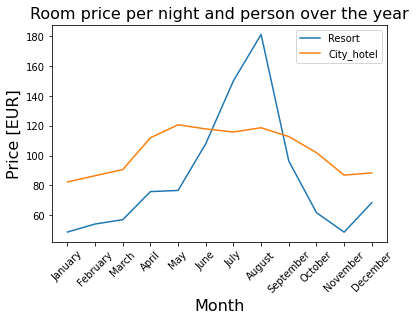

In [ ]:
#Merging both of the plot to compare the price difference between Resort & City hotel
sns.lineplot(x = "month", y="price_for_resort", data=final,label='Resort')
sns.lineplot(x = "month", y="price_for_city_hotel", data=final,label='City_hotel')
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend()
plt.show()


## Distribution of Nights Spent at Hotels by Market Segment and Hotel Type

In [ ]:
data.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
px.box(data, x="market_segment", y="stays_in_week_nights", color='hotel', title='Price of room types per night and person', template='plotly_dark')

#### Conclusion-->>
    It can be seen that most of the groups are normal distributed, some of them have high skewness. 
    Looking at the distribution, most people do not seem to prefer to stay at the hotel for more than 1 week. 
    But it seems normal to stay in resort hotels for up to 12-13 days
    It is obvious that when people go to resort hotels, they prefer to stay more.

## Analysing Preference of Guests, what they basically Prefer?

In [ ]:
px.pie(data,names=data['meal'].value_counts().index,values=data['meal'].value_counts().values,hole=0.5, template='plotly_dark')

#### Conclusion-->>
    Below the donut pie graph shows the meal categories. There is a big difference in the Bed&Breakfast category and the others. Almost 80% of bookings reserved for Bed&Breakfast.

## Simplify your analysis on the basis of differen types of hotels & meals

In [ ]:
data.groupby(['hotel','meal']).agg({'meal':'count'}).unstack()

meal                                  
meal               BB     FB      HB       SC Undefined
hotel                                                  
City Hotel    62233.0   44.0  6412.0  10474.0       NaN
Resort Hotel  30003.0  754.0  8046.0     75.0    1169.0

## Analyse Special Request done by Cuustomers¶

In [ ]:
px.histogram(data, x='total_of_special_requests', title='Total Special Request', template='plotly_dark')

#### Conclusion-->> 
    Around 55% of bookings do not have any special requests

In [ ]:
data.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
pivot=data.groupby([ 'total_of_special_requests', 'is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'count'}).unstack()
pivot

count       
is_canceled                    0      1
total_of_special_requests              
0                          36667  33534
1                          25867   7316
2                          10086   2866
3                           2049    445
4                            304     36
5                             38      2

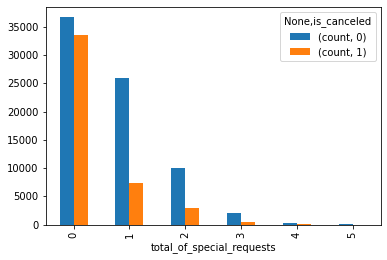

In [ ]:
pivot.plot(kind='bar')

#### Conclusion-->> 
    This graph is about the relationship between special requests and cancellation booking status. 
    
    Nearly half bookings without any special requests have been cancelled and another half of them have not been canceled.

## Which are the most busy month or in which months Guests are high?

In [ ]:
data_resort.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

month  no of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866

In [ ]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

month  no of guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249

In [ ]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no of guests in resort','no of guest in city hotel']
final_rush

month  no of guests in resort  no of guest in city hotel
0      August                    3257                       5367
1        July                    3137                       4770
2     October                    2575                       4326
3       March                    2571                       4049
4       April                    2550                       4010
5         May                    2535                       4568
6    February                    2308                       3051
7   September                    2102                       4283
8        June                    2037                       4358
9    December                    2014                       2377
10   November                    1975                       2676
11    January                    1866                       2249

In [ ]:
final_rush=sd.Sort_Dataframeby_Month(df=final_rush,monthcolumnname='month')
final_rush

month  no of guests in resort  no of guest in city hotel
0     January                    1866                       2249
1    February                    2308                       3051
2       March                    2571                       4049
3       April                    2550                       4010
4         May                    2535                       4568
5        June                    2037                       4358
6        July                    3137                       4770
7      August                    3257                       5367
8   September                    2102                       4283
9     October                    2575                       4326
10   November                    1975                       2676
11   December                    2014                       2377

In [ ]:
final_rush.dtypes

month                        object
no of guests in resort        int64
no of guest in city hotel     int64
dtype: object

In [ ]:
final_rush.columns

Index(['month', 'no of guests in resort', 'no of guest in city hotel'], dtype='object')

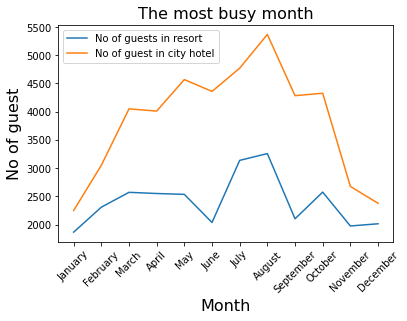

In [ ]:
sns.lineplot(x = "month", y='no of guests in resort', data=final_rush, label='No of guests in resort')
sns.lineplot(x = "month", y='no of guest in city hotel', data=final_rush, label='No of guest in city hotel')
plt.title("The most busy month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("No of guest", fontsize=16)
plt.legend()
plt.show()


### Conclusion -->
    The City hotel has more guests during spring and autumn, when the prices are also highest.
    In July and August there are less visitors, although prices are lower.

    Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.
    Both hotels have the fewest guests during the winter.

## How long do people stay at the hotels?

In [ ]:
#Filtering the dataset to get the reservation data which were not cancelled
filter=data['is_canceled']==0
clean_data=data[filter]

In [ ]:
clean_data.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
clean_data.head()

hotel  is_canceled  ...  reservation_status_date  total_nights
0  Resort Hotel            0  ...                 7/1/2015             0
1  Resort Hotel            0  ...                 7/1/2015             0
2  Resort Hotel            0  ...                 7/2/2015             1
3  Resort Hotel            0  ...                 7/2/2015             1
4  Resort Hotel            0  ...                 7/3/2015             2

[5 rows x 33 columns]

In [ ]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay.head()

total_nights         hotel  is_canceled
0             0    City Hotel          251
1             0  Resort Hotel          371
2             1    City Hotel         9155
3             1  Resort Hotel         6579
4             2    City Hotel        10983

In [ ]:
stay=stay.rename(columns={'is_canceled':'Number of stays'})
stay.head()

total_nights         hotel  Number of stays
0             0    City Hotel              251
1             0  Resort Hotel              371
2             1    City Hotel             9155
3             1  Resort Hotel             6579
4             2    City Hotel            10983

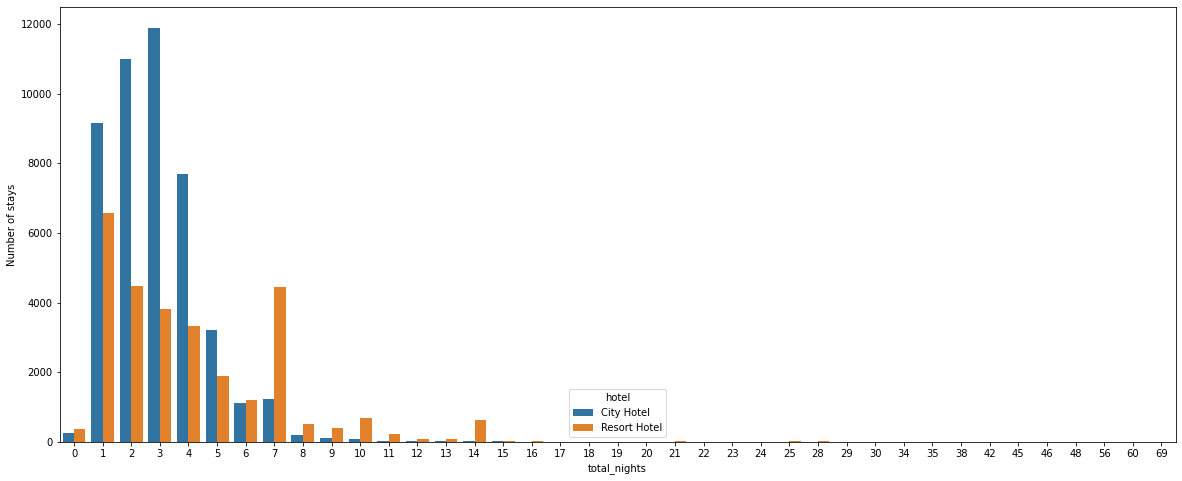

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x = "total_nights", y = "Number of stays" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=stay)

In [ ]:
#Visualizing the the data
px.bar(stay, x = "total_nights", y = "Number of stays", color="hotel", title='Number of people stayed in the city & resort hotel',
       color_continuous_scale=["total_nights", "Number of stays"], template='plotly_dark')

## Bookings by market segment

In [ ]:
clean_data['market_segment'].value_counts()

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

In [ ]:
# pie plot
fig=px.pie(clean_data,
             values=clean_data['market_segment'].value_counts().values,
             names=clean_data['market_segment'].value_counts().index,
             title="Bookings per market segment", template='plotly_dark')
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

##  Price per night (ADR) and person based on booking and room

In [ ]:
clean_data.head()

hotel  is_canceled  ...  reservation_status_date  total_nights
0  Resort Hotel            0  ...                 7/1/2015             0
1  Resort Hotel            0  ...                 7/1/2015             0
2  Resort Hotel            0  ...                 7/2/2015             1
3  Resort Hotel            0  ...                 7/2/2015             1
4  Resort Hotel            0  ...                 7/3/2015             2

[5 rows x 33 columns]

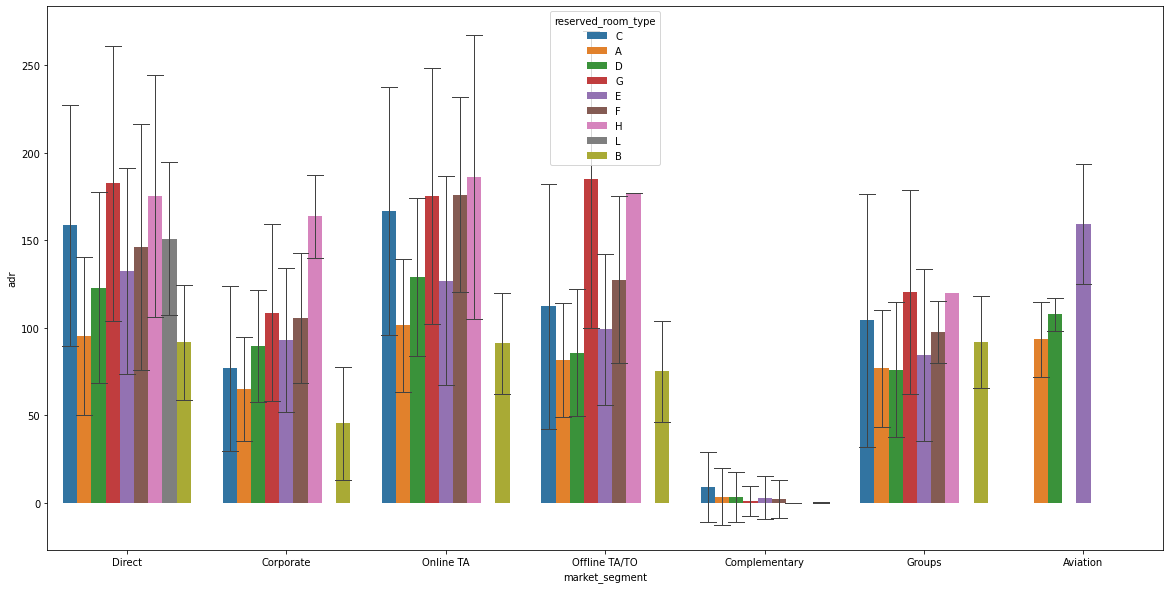

In [ ]:
#Visualizing the dataset
plt.figure(figsize=(20, 10))
sns.barplot(x="market_segment",
            y="adr",
            hue="reserved_room_type",
            data=clean_data,
            ci="sd",
            errwidth=1,
            capsize=0.1)

## How many bookings were cancelled?

In [ ]:
#Retriving the data of cancelled reservation
cancel=data[data['is_canceled']==1]

In [ ]:
#Splitting the data of cancelled reservation for Resort hotel & City hotel and getting the total number of cancellations
rh_cancelations = cancel[cancel["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = cancel[cancel["hotel"] == "City Hotel"]["is_canceled"].sum()

In [ ]:
#Printing the sum of cancellation for resort hotel
rh_cancelations

11120

In [ ]:
#Printing the sum of cancellation for city hotel
ch_cancelations

33079

In [ ]:
#converting entire stats into percentage
px.pie(values=[rh_cancelations,ch_cancelations],names=['Cancelations in resort hotel','Cancelations in city hotel'],title='Reservation cancelled by Resort hotel & City hotel' ,template='plotly_dark')

## Which month have the highest number of cancellations?

In [ ]:
#Viewing the data frame
data.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out                 7/1/2015
1  Resort Hotel            0  ...           Check-Out                 7/1/2015
2  Resort Hotel            0  ...           Check-Out                 7/2/2015
3  Resort Hotel            0  ...           Check-Out                 7/2/2015
4  Resort Hotel            0  ...           Check-Out                 7/3/2015

[5 rows x 32 columns]

In [ ]:
#Filtering the data to get the cancelled reservations
cancellation=data[data['is_canceled']==1]
cancellation.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
8   Resort Hotel            1  ...            Canceled                 5/6/2015
9   Resort Hotel            1  ...            Canceled                4/22/2015
10  Resort Hotel            1  ...            Canceled                6/23/2015
27  Resort Hotel            1  ...            Canceled                5/11/2015
32  Resort Hotel            1  ...            Canceled                5/29/2015

[5 rows x 32 columns]

In [ ]:
#Viewing the unique values in the  hotel column
cancellation['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
#Creating a data set which show the arrival date, hotel & total count of cancelled reservatioins
cancel_month=data.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancelled=cancel_month.iloc[:,0:3]

In [ ]:
cancelled

arrival_date_month         hotel  is_canceled
0               April    City Hotel         7469
1               April  Resort Hotel         3609
2              August    City Hotel         8967
3              August  Resort Hotel         4894
4            December    City Hotel         4114
5            December  Resort Hotel         2645
6            February    City Hotel         4950
7            February  Resort Hotel         3102
8             January    City Hotel         3730
9             January  Resort Hotel         2191
10               July    City Hotel         8071
11               July  Resort Hotel         4573
12               June    City Hotel         7885
13               June  Resort Hotel         3044
14              March    City Hotel         6434
15              March  Resort Hotel         3334
16                May    City Hotel         8221
17                May  Resort Hotel         3559
18           November    City Hotel         4336
19           November  Resort Hotel         2435
20            October    City Hotel         7594
21            October  Resort Hotel         3553
22          September    City Hotel         7392
23          September  Resort Hotel         3108

In [ ]:
#Renaming the column is_canceled
cancelled=cancelled.rename(columns={'is_canceled':'no of cancellations'})
cancelled

arrival_date_month         hotel  no of cancellations
0               April    City Hotel                 7469
1               April  Resort Hotel                 3609
2              August    City Hotel                 8967
3              August  Resort Hotel                 4894
4            December    City Hotel                 4114
5            December  Resort Hotel                 2645
6            February    City Hotel                 4950
7            February  Resort Hotel                 3102
8             January    City Hotel                 3730
9             January  Resort Hotel                 2191
10               July    City Hotel                 8071
11               July  Resort Hotel                 4573
12               June    City Hotel                 7885
13               June  Resort Hotel                 3044
14              March    City Hotel                 6434
15              March  Resort Hotel                 3334
16                May    City Hotel                 8221
17                May  Resort Hotel                 3559
18           November    City Hotel                 4336
19           November  Resort Hotel                 2435
20            October    City Hotel                 7594
21            October  Resort Hotel                 3553
22          September    City Hotel                 7392
23          September  Resort Hotel                 3108

In [ ]:
#Sorting the dataset by month
final=sd.Sort_Dataframeby_Month(cancelled,'arrival_date_month')
final

arrival_date_month         hotel  no of cancellations
0             January    City Hotel                 3730
1             January  Resort Hotel                 2191
2            February    City Hotel                 4950
3            February  Resort Hotel                 3102
4               March    City Hotel                 6434
5               March  Resort Hotel                 3334
6               April    City Hotel                 7469
7               April  Resort Hotel                 3609
8                 May    City Hotel                 8221
9                 May  Resort Hotel                 3559
10               June    City Hotel                 7885
11               June  Resort Hotel                 3044
12               July    City Hotel                 8071
13               July  Resort Hotel                 4573
14             August    City Hotel                 8967
15             August  Resort Hotel                 4894
16          September    City Hotel                 7392
17          September  Resort Hotel                 3108
18            October    City Hotel                 7594
19            October  Resort Hotel                 3553
20           November    City Hotel                 4336
21           November  Resort Hotel                 2435
22           December    City Hotel                 4114
23           December  Resort Hotel                 2645

In [ ]:
#Visualizing the the data
px.bar(final, x = "arrival_date_month", y = "no of cancellations" , color="hotel", 
       color_continuous_scale=["City Hotel", "Resort Hotel"], template='plotly_dark')

#### Conclusion -->
    For the City hotel the relative number of cancelations is around 40 % throughout the year.
    For the Resort hotel has highest no of cancelations in the summer and lowest during the winter.

In [ ]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']
data.drop(useless_col, axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.head()

hotel  is_canceled  ...  total_of_special_requests reservation_status_date
0  Resort Hotel            0  ...                          0                7/1/2015
1  Resort Hotel            0  ...                          0                7/1/2015
2  Resort Hotel            0  ...                          0                7/2/2015
3  Resort Hotel            0  ...                          0                7/2/2015
4  Resort Hotel            0  ...                          1                7/3/2015

[5 rows x 26 columns]

In [ ]:
a = data.select_dtypes(object).columns
for i in a:
    print (i, df[i].nunique())

hotel 2
arrival_date_month 12
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
customer_type 4
reservation_status_date 926


In [ ]:
le=LabelEncoder()

data['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

data['year'] = data['reservation_status_date'].dt.year
data['month'] = data['reservation_status_date'].dt.month
data['day'] = data['reservation_status_date'].dt.day

data.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
a = data.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, data[i].nunique())
    cat_list.append(i)

hotel 2
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 9
deposit_type 3
customer_type 4


In [ ]:
for i in cat_list:
    data[i] = le.fit_transform(data[i])
data['year'] = le.fit_transform(data['year'])
data['month'] = le.fit_transform(data['month'])
data['day'] = le.fit_transform(data['day'])

# Building A ML Model

Train Test Split

In [ ]:
X = data.drop('is_canceled', axis = 1)
Y = data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=3,test_size=0.3)

Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Building

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

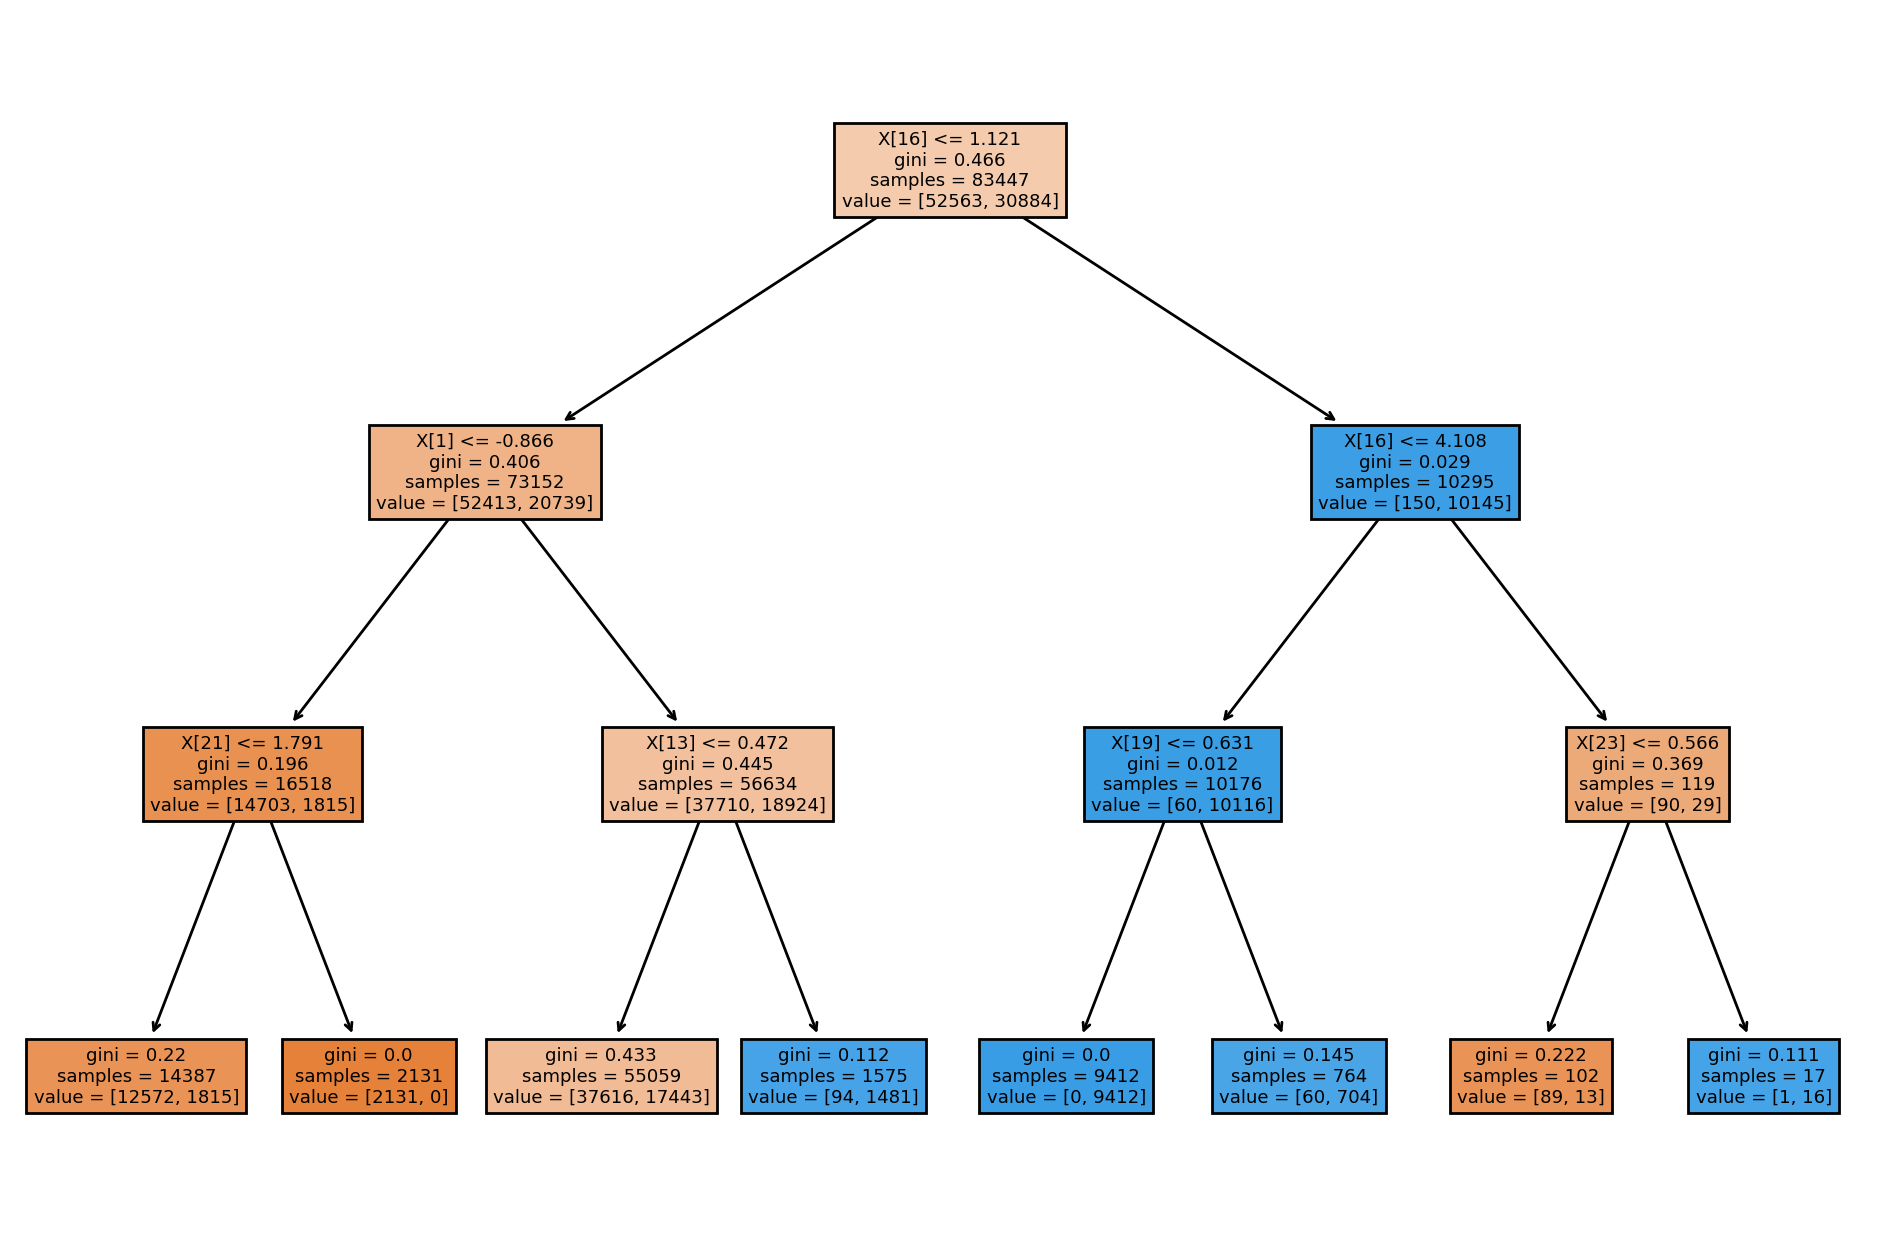

In [ ]:
plt.figure(figsize=(12,8), dpi=200)
pruned_dtc = DecisionTreeClassifier(max_depth=3)
pruned_dtc.fit(X_train, y_train)
y_pred_dtc = pruned_dtc.predict(X_test)
plot_tree(pruned_dtc, filled = True);

Model Evaluation

In [ ]:
acc_dtc = accuracy_score(y_test, pred_dtc)
conf = confusion_matrix(y_test, pred_dtc)
clf_report = classification_report(y_test, pred_dtc)
acc_dtc

0.952157257500769

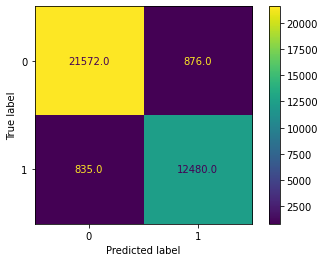

In [ ]:
plot_confusion_matrix(dtc, X_test, y_test, values_format='.1f')

In [ ]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22448
           1       0.93      0.94      0.94     13315

    accuracy                           0.95     35763
   macro avg       0.95      0.95      0.95     35763
weighted avg       0.95      0.95      0.95     35763



In [ ]:
list_of_tuples = list(zip(y_test, pred_dtc))   
# Assign data to tuples.
list_of_tuples 
# Converting lists of tuples into
# pandas Dataframe.
df = pd.DataFrame(list_of_tuples, columns = ['Actual Value', 'Predicted Value']) 
# Print data.
df.head()

Actual Value  Predicted Value
0             0                0
1             0                0
2             0                0
3             1                1
4             0                0